In [44]:
import pandas as pd
import kagglehub
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [3]:
# Download the dataset from Kaggle

path = kagglehub.dataset_download("rashikrahmanpritom/data-science-job-posting-on-glassdoor")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\rashikrahmanpritom\data-science-job-posting-on-glassdoor\versions\1


In [4]:
##read in the csv file as a pandas dataframe
dsjob = pd.read_csv('Uncleaned_DS_jobs.csv')

In [5]:
#Get an overview of dataset
dsjob.shape


(672, 15)

In [6]:
dsjob.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
dsjob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [8]:
#check for missing value
dsjob.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [13]:
#check for row with duplicates and rop if there are any
dsjob[dsjob.duplicated()]


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [33]:
#Handle Salary Estimate
dsjob['Salary Estimate'] = dsjob['Salary Estimate'].str.replace('$','').str.replace('K','000').str.replace(' (Glassdoor est.)','').str.replace('(Employer est.)','')
dsjob[['min_salary', 'max_salary']] = dsjob['Salary Estimate'].str.split('-', expand = True)
dsjob['min_salary'] = pd.to_numeric(dsjob['min_salary'])
dsjob['max_salary'] = pd.to_numeric(dsjob['max_salary'])
dsjob['avg_salary'] = (dsjob['max_salary'] + dsjob['min_salary'])/2



In [34]:
# Extract state only (second part after comma) and strip spaces
dsjob['state'] = dsjob['Location'].str.split(',').str[1].str.strip()

In [ ]:
#Drop competitors column
dsjob.drop(columns=['Competitors'], inplace=True)
dsjob.drop(columns=['Index'], inplace = True )


KeyError: "['Index'] not found in axis"

In [37]:
#Skill extraction from job description
dsjob['python'] = dsjob['Job Description'].str.lower().str.contains('python').astype(int)
dsjob['excel'] = dsjob['Job Description'].str.lower().str.contains('excel').astype(int)
dsjob['tableau'] = dsjob['Job Description'].str.lower().str.contains('tableau').astype(int)
dsjob['big data'] = dsjob['Job Description'].str.lower().str.contains('big data').astype(int)
dsjob['hadoop'] = dsjob['Job Description'].str.lower().str.contains('hadoop').astype(int)
dsjob['spark'] = dsjob['Job Description'].str.lower().str.contains('spark').astype(int)
dsjob['aws'] = dsjob['Job Description'].str.lower().str.contains('aws').astype(int)

In [39]:
#Job category
def title_simplifier(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'analyst' in title:
        return 'analyst'
    elif 'engineer' in title:
        return 'engineer'
    else:
        return 'other'

dsjob['job_simplified'] = dsjob['Job Title'].apply(title_simplifier)
dsjob.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,state,python,excel,tableau,big data,hadoop,spark,aws,job_simplified
0,0,Sr Data Scientist,137000-171000,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,154000.0,NY,0,0,0,0,0,0,1,data scientist
1,1,Data Scientist,137000-171000,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,154000.0,VA,0,0,0,1,1,0,0,data scientist
2,2,Data Scientist,137000-171000,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,154000.0,MA,1,1,0,0,0,0,1,data scientist
3,3,Data Scientist,137000-171000,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,154000.0,MA,1,1,0,0,0,0,1,data scientist
4,4,Data Scientist,137000-171000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,154000.0,NY,1,1,0,0,0,0,0,data scientist


In [ ]:
#Sum the number of job category
dsjob['job_simplified'].value_counts()

job_simplified
data scientist    455
engineer           92
other              70
analyst            55
Name: count, dtype: int64

In [ ]:
#Company age
dsjob['company_age'] = 2025 - dsjob['Founded']
TA SE XU LY LAI SAU


In [43]:
# Clean the space in the head or tail of data
# Identify object-type columns
obj_cols = dsjob.select_dtypes(include=['object']).columns

# Strip whitespace in place
for col in obj_cols:
    dsjob[col] = dsjob[col].str.strip()


<Axes: xlabel='Rating', ylabel='Count'>

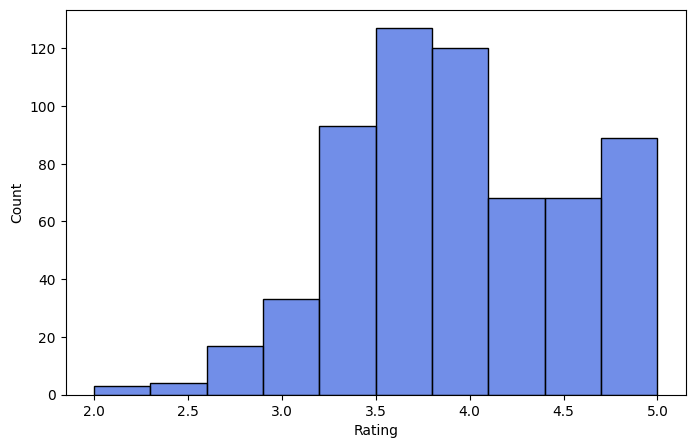

In [51]:
#EDA
# Remove invalid values like -1
valid_ratings = dsjob[dsjob['Rating'] != -1]['Rating']

# Create a styled histogram
plt.figure(figsize=(8, 5))
sn.histplot(valid_ratings, bins=10, kde=False, color='royalblue', edgecolor='black')

In [52]:
dsjob['company_age'].value_counts()


company_age
2026    118
13       34
14       25
26       22
10       22
       ... 
48        1
129       1
53        1
76        1
63        1
Name: count, Length: 103, dtype: int64

In [ ]:
#sTRIP